In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

ÁNALISIS ÁMSTERDAM

ETAPA 1: PROCESAMIENTO DE DATOS

In [3]:
#Carga desde un archivo csv
df= pd.read_csv('Amsterdam.csv', encoding='latin1') 

In [4]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7608 non-null   float64
 1   listing_url                                   7608 non-null   object 
 2   scrape_id                                     7608 non-null   float64
 3   last_scraped                                  7608 non-null   object 
 4   source                                        7608 non-null   object 
 5   name                                          7608 non-null   object 
 6   description                                   7606 non-null   object 
 7   neighborhood_overview                         4838 non-null   object 
 8   picture_url                                   7608 non-null   object 
 9   host_id                                       7608 non-null   i

In [5]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,155548.0,https://www.airbnb.com/rooms/155548,2.023060e+13,06/06/2023,previous scrape,Rental unit in Amsterdam Â· â 4.76 Â· 1 bedro...,Stay in one of the most vibrant neighborhoods ...,NaN,https://a0.muscache.com/pictures/1044450/d99b2...,748161,...,4.86,4.33,4.52,0363 A562 4D7E 4A91 60DF,f,1,1,0,0,0.15
1,162467.0,https://www.airbnb.com/rooms/162467,2.023060e+13,06/06/2023,city scrape,Rental unit in Amsterdam Â· â 4.77 Â· 1 bedro...,Stylish (recently painted and redecorated) gro...,"It's a quiet neigbourhood, with shops and rest...",https://a0.muscache.com/pictures/44305545/45b3...,776296,...,4.92,4.70,4.50,0363 C6C3 A2DC 89AC B72B,f,1,1,0,0,0.53
2,213371.0,https://www.airbnb.com/rooms/213371,2.023060e+13,06/06/2023,previous scrape,Rental unit in Amsterdam Â· â 4.86 Â· 3 bedro...,De Pijp is a very popular area which has a lot...,NaN,https://a0.muscache.com/pictures/2beb58b4-03c5...,1100324,...,5.00,4.86,4.64,0363 F88F 4B47 6E9B 225B,f,1,1,0,0,0.16
3,214531.0,https://www.airbnb.com/rooms/214531,2.023060e+13,06/06/2023,city scrape,Rental unit in Amsterdam Â· â 4.82 Â· 1 bedro...,Just 1 minute from the Damsquare in Amsterdam ...,"The small guesthouse is very central situated,...",https://a0.muscache.com/pictures/de8639df-d73c...,1107389,...,4.84,4.89,4.74,0363 1939 7BED DDCD 0353,f,1,0,1,0,1.24
4,2818.0,https://www.airbnb.com/rooms/2818,2.023060e+13,05/06/2023,city scrape,Condo in Amsterdam Â· â 4.89 Â· 1 bedroom Â· ...,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.80,NaN,f,1,0,1,0,1.95


In [6]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               710
Length: 75, dtype: int64

In [7]:
#Elegimos 20 variables a limpiar/analizar
df1=df.loc[ : , ["host_response_time","host_acceptance_rate", "host_identity_verified", "property_type",
                 "number_of_reviews", "availability_365", "review_scores_cleanliness", "review_scores_communication",
                 "review_scores_location", "review_scores_value", "host_location", "host_is_superhost", "beds", "price", "minimum_nights", 
                 "maximum_nights", "host_verifications", "bathrooms_text", "instant_bookable", "host_has_profile_pic" ]]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           5349 non-null   object 
 1   host_acceptance_rate         6386 non-null   object 
 2   host_identity_verified       7608 non-null   object 
 3   property_type                7608 non-null   object 
 4   number_of_reviews            7608 non-null   int64  
 5   availability_365             7608 non-null   int64  
 6   review_scores_cleanliness    6893 non-null   float64
 7   review_scores_communication  6893 non-null   float64
 8   review_scores_location       6893 non-null   float64
 9   review_scores_value          6893 non-null   float64
 10  host_location                6786 non-null   object 
 11  host_is_superhost            6395 non-null   object 
 12  beds                         7533 non-null   float64
 13  price             

In [9]:
#Verificamos datos nulos de df1
valores_nulos=df1.isnull().sum()
valores_nulos

host_response_time             2259
host_acceptance_rate           1222
host_identity_verified            0
property_type                     0
number_of_reviews                 0
availability_365                  0
review_scores_cleanliness       715
review_scores_communication     715
review_scores_location          715
review_scores_value             715
host_location                   822
host_is_superhost              1213
beds                             75
price                             0
minimum_nights                    0
maximum_nights                    0
host_verifications                0
bathrooms_text                    8
instant_bookable                  0
host_has_profile_pic              0
dtype: int64

LIMPIEZA AMSTERDAM

In [10]:
# review_scores_cleanliness, review_scores_communication, review_scores_location, 
#review_scores_value, beds, review_scores_checkin, reviews_per_month
# Ya que son variables numericas (de cantidad de baños o camas) colocamos el promedio de cada variable en los datos nulos
df1["review_scores_cleanliness"]=df1["review_scores_cleanliness"].fillna(round(df["review_scores_cleanliness"].mean(),1))
df1["review_scores_communication"]=df1["review_scores_communication"].fillna(round(df["review_scores_communication"].mean(),1))
df1["review_scores_location"]=df1["review_scores_location"].fillna(round(df["review_scores_location"].mean(),1))
df1["review_scores_value"]=df1["review_scores_value"].fillna(round(df["review_scores_value"].mean(),1))
df1["beds"]=df1["beds"].fillna(round(df["beds"].mean(),1))

In [11]:
#host_response_time, host_acceptance_rate, host_location, host_is_superhost
#Ya que son variables cualitativos, en todos los espacios nulos colocamos la palabra "DESCONOCIDO"
df1 = df1.fillna("DESCONOCIDO")
df1

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,number_of_reviews,availability_365,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,host_location,host_is_superhost,beds,price,minimum_nights,maximum_nights,host_verifications,bathrooms_text,instant_bookable,host_has_profile_pic
0,DESCONOCIDO,100%,t,Entire rental unit,21,0,4.81,4.86,4.33,4.52,"Amsterdam, Netherlands",f,1.0,200,3,15,"['email', 'phone']",1.5 baths,f,t
1,within a day,45%,t,Entire rental unit,67,157,4.67,4.92,4.70,4.50,"Amsterdam, Netherlands",f,1.0,170,3,3,"['email', 'phone']",1 bath,f,t
2,DESCONOCIDO,71%,t,Entire rental unit,23,2,4.23,5.00,4.86,4.64,"Amsterdam, Netherlands",f,4.0,270,4,65,"['email', 'phone']",1.5 baths,f,t
3,DESCONOCIDO,DESCONOCIDO,f,Private room in rental unit,175,0,4.77,4.84,4.89,4.74,"Amsterdam, Netherlands",f,2.0,115,3,50,"['email', 'phone']",1 private bath,f,t
4,within an hour,100%,t,Private room in condo,336,7,4.99,4.98,4.69,4.80,"Amsterdam, Netherlands",DESCONOCIDO,2.0,69,3,28,"['email', 'phone']",1.5 shared baths,f,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,DESCONOCIDO,41%,t,Entire rental unit,0,17,4.80,4.90,4.80,4.60,"Amsterdam, Netherlands",f,2.0,500,2,365,"['email', 'phone']",1 bath,f,t
7604,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,0,34,4.80,4.90,4.80,4.60,"Amsterdam, Netherlands",f,2.0,190,2,30,"['email', 'phone']",1 bath,f,t
7605,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,0,18,4.80,4.90,4.80,4.60,"Amsterdam, Netherlands",f,2.0,359,2,365,"['email', 'phone']",1 bath,f,t
7606,DESCONOCIDO,DESCONOCIDO,t,Entire home,0,73,4.80,4.90,4.80,4.60,"Amsterdam, Netherlands",f,2.0,223,1,30,"['email', 'phone']",2 baths,f,t


In [12]:
#Verificamos datos nulos de df1
valores_nulos=df1.isnull().sum()
valores_nulos

host_response_time             0
host_acceptance_rate           0
host_identity_verified         0
property_type                  0
number_of_reviews              0
availability_365               0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
host_location                  0
host_is_superhost              0
beds                           0
price                          0
minimum_nights                 0
maximum_nights                 0
host_verifications             0
bathrooms_text                 0
instant_bookable               0
host_has_profile_pic           0
dtype: int64

MÉTODO: RANGO INTERCUARTILICO

In [13]:
df_intercuartilico=df1.loc[ : , ["review_scores_cleanliness", "review_scores_communication", "review_scores_location", 
"review_scores_value", "beds", "number_of_reviews", "availability_365", "price",
"minimum_nights", "maximum_nights"]]
df_intercuartilico

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.81,4.86,4.33,4.52,1.0,21,0,200,3,15
1,4.67,4.92,4.70,4.50,1.0,67,157,170,3,3
2,4.23,5.00,4.86,4.64,4.0,23,2,270,4,65
3,4.77,4.84,4.89,4.74,2.0,175,0,115,3,50
4,4.99,4.98,4.69,4.80,2.0,336,7,69,3,28
...,...,...,...,...,...,...,...,...,...,...
7603,4.80,4.90,4.80,4.60,2.0,0,17,500,2,365
7604,4.80,4.90,4.80,4.60,2.0,0,34,190,2,30
7605,4.80,4.90,4.80,4.60,2.0,0,18,359,2,365
7606,4.80,4.90,4.80,4.60,2.0,0,73,223,1,30


In [14]:
df_cuali=df1.loc[ : , ["host_response_time", "host_acceptance_rate", "host_identity_verified", "property_type", "host_location", "host_is_superhost", 
                      "instant_bookable", "host_has_profile_pic", "bathrooms_text", "host_verifications", ]]
df_cuali

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,host_location,host_is_superhost,instant_bookable,host_has_profile_pic,bathrooms_text,host_verifications
0,DESCONOCIDO,100%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1.5 baths,"['email', 'phone']"
1,within a day,45%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']"
2,DESCONOCIDO,71%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1.5 baths,"['email', 'phone']"
3,DESCONOCIDO,DESCONOCIDO,f,Private room in rental unit,"Amsterdam, Netherlands",f,f,t,1 private bath,"['email', 'phone']"
4,within an hour,100%,t,Private room in condo,"Amsterdam, Netherlands",DESCONOCIDO,f,t,1.5 shared baths,"['email', 'phone']"
...,...,...,...,...,...,...,...,...,...,...
7603,DESCONOCIDO,41%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']"
7604,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']"
7605,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']"
7606,DESCONOCIDO,DESCONOCIDO,t,Entire home,"Amsterdam, Netherlands",f,f,t,2 baths,"['email', 'phone']"


<Figure size 1500x800 with 0 Axes>

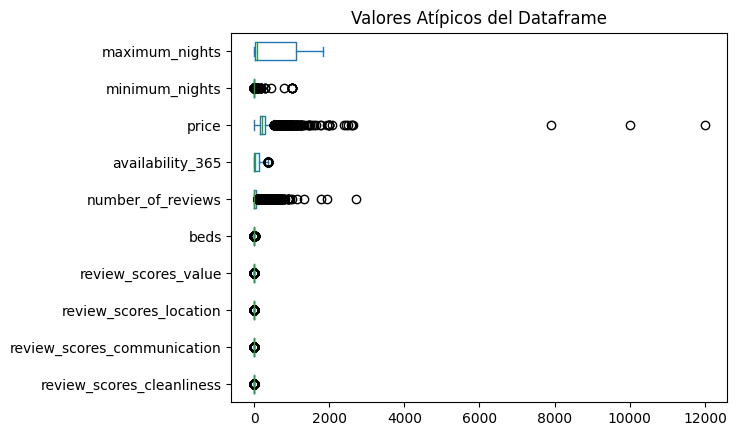

In [15]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_intercuartilico.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [16]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=df_intercuartilico

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido review_scores_cleanliness         5.465
review_scores_communication       5.165
review_scores_location            5.435
review_scores_value               5.230
beds                              3.500
number_of_reviews                95.500
availability_365                362.500
price                           528.000
minimum_nights                    7.000
maximum_nights                 2781.000
dtype: float64
Limite inferior permitido review_scores_cleanliness         4.225
review_scores_communication       4.725
review_scores_location            4.275
review_scores_value               4.110
beds                             -0.500
number_of_reviews               -52.500
availability_365               -217.500
price                           -80.000
minimum_nights                   -1.000
maximum_nights                -1635.000
dtype: float64


In [17]:
#Encontramos Outliers del Dataframe
outliers_iqr= df_intercuartilico[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,175.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,336.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Obtenemos datos limpios del Dataframe
data_iqr= df_intercuartilico[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.81,4.86,4.33,4.52,1.0,21.0,0.0,200.0,3.0,15
1,4.67,4.92,4.70,4.50,1.0,67.0,157.0,170.0,3.0,3
2,4.23,5.00,4.86,4.64,NaN,23.0,2.0,270.0,4.0,65
3,4.77,4.84,4.89,4.74,2.0,NaN,0.0,115.0,3.0,50
4,4.99,4.98,4.69,4.80,2.0,NaN,7.0,69.0,3.0,28
...,...,...,...,...,...,...,...,...,...,...
7603,4.80,4.90,4.80,4.60,2.0,0.0,17.0,500.0,2.0,365
7604,4.80,4.90,4.80,4.60,2.0,0.0,34.0,190.0,2.0,30
7605,4.80,4.90,4.80,4.60,2.0,0.0,18.0,359.0,2.0,365
7606,4.80,4.90,4.80,4.60,2.0,0.0,73.0,223.0,1.0,30


In [19]:
valores_nulos=data_iqr.isnull().sum()
valores_nulos

review_scores_cleanliness      388
review_scores_communication    751
review_scores_location         265
review_scores_value            405
beds                           709
number_of_reviews              947
availability_365                51
price                          353
minimum_nights                 322
maximum_nights                   0
dtype: int64

In [20]:
#Reemplazamos valores atípicos (nulos) con "mean"
data1_iqr=data_iqr.copy()
data1_iqr=data1_iqr.fillna(round(data_iqr.mean(),1))
data1_iqr

,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,4.81,4.86,4.33,4.52,1.0,21.0,0.0,200.0,3.0,15
1,4.67,4.92,4.70,4.50,1.0,67.0,157.0,170.0,3.0,3
2,4.23,5.00,4.86,4.64,1.5,23.0,2.0,270.0,4.0,65
3,4.77,4.84,4.89,4.74,2.0,17.4,0.0,115.0,3.0,50
4,4.99,4.98,4.69,4.80,2.0,17.4,7.0,69.0,3.0,28
...,...,...,...,...,...,...,...,...,...,...
7603,4.80,4.90,4.80,4.60,2.0,0.0,17.0,500.0,2.0,365
7604,4.80,4.90,4.80,4.60,2.0,0.0,34.0,190.0,2.0,30
7605,4.80,4.90,4.80,4.60,2.0,0.0,18.0,359.0,2.0,365
7606,4.80,4.90,4.80,4.60,2.0,0.0,73.0,223.0,1.0,30


In [21]:
Datos_Amsterdam_Limpios= pd.concat([df_cuali, df_intercuartilico], axis=1)
Datos_Amsterdam_Limpios

,host_response_time,host_acceptance_rate,host_identity_verified,property_type,host_location,host_is_superhost,instant_bookable,host_has_profile_pic,bathrooms_text,host_verifications,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,beds,number_of_reviews,availability_365,price,minimum_nights,maximum_nights
0,DESCONOCIDO,100%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1.5 baths,"['email', 'phone']",4.81,4.86,4.33,4.52,1.0,21,0,200,3,15
1,within a day,45%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']",4.67,4.92,4.70,4.50,1.0,67,157,170,3,3
2,DESCONOCIDO,71%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1.5 baths,"['email', 'phone']",4.23,5.00,4.86,4.64,4.0,23,2,270,4,65
3,DESCONOCIDO,DESCONOCIDO,f,Private room in rental unit,"Amsterdam, Netherlands",f,f,t,1 private bath,"['email', 'phone']",4.77,4.84,4.89,4.74,2.0,175,0,115,3,50
4,within an hour,100%,t,Private room in condo,"Amsterdam, Netherlands",DESCONOCIDO,f,t,1.5 shared baths,"['email', 'phone']",4.99,4.98,4.69,4.80,2.0,336,7,69,3,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,DESCONOCIDO,41%,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']",4.80,4.90,4.80,4.60,2.0,0,17,500,2,365
7604,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']",4.80,4.90,4.80,4.60,2.0,0,34,190,2,30
7605,DESCONOCIDO,DESCONOCIDO,t,Entire rental unit,"Amsterdam, Netherlands",f,f,t,1 bath,"['email', 'phone']",4.80,4.90,4.80,4.60,2.0,0,18,359,2,365
7606,DESCONOCIDO,DESCONOCIDO,t,Entire home,"Amsterdam, Netherlands",f,f,t,2 baths,"['email', 'phone']",4.80,4.90,4.80,4.60,2.0,0,73,223,1,30


In [22]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_Amsterdam_Limpios.isnull().sum()
valores_nulos

host_response_time             0
host_acceptance_rate           0
host_identity_verified         0
property_type                  0
host_location                  0
host_is_superhost              0
instant_bookable               0
host_has_profile_pic           0
bathrooms_text                 0
host_verifications             0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
beds                           0
number_of_reviews              0
availability_365               0
price                          0
minimum_nights                 0
maximum_nights                 0
dtype: int64

In [23]:
#Convertir DataFrame a CSV
Datos_Amsterdam_Limpios.to_csv("Datos_limpios_Amsterdam.csv")

EXTRACCIÓN DE CARACTERÍSTICAS Y VISUALIZACIÓN DE DATOS

In [24]:
Analisis_Amsterdam = Datos_Amsterdam_Limpios.copy()

In [25]:
Analisis_Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           7608 non-null   object 
 1   host_acceptance_rate         7608 non-null   object 
 2   host_identity_verified       7608 non-null   object 
 3   property_type                7608 non-null   object 
 4   host_location                7608 non-null   object 
 5   host_is_superhost            7608 non-null   object 
 6   instant_bookable             7608 non-null   object 
 7   host_has_profile_pic         7608 non-null   object 
 8   bathrooms_text               7608 non-null   object 
 9   host_verifications           7608 non-null   object 
 10  review_scores_cleanliness    7608 non-null   float64
 11  review_scores_communication  7608 non-null   float64
 12  review_scores_location       7608 non-null   float64
 13  review_scores_valu

Index(['host_response_time', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.362907
1    0.296924
2    0.168901
3    0.153128
4    0.018139
Name: percentage, dtype: float64
5
5


Text(0, 0.5, 'Frecuencia')

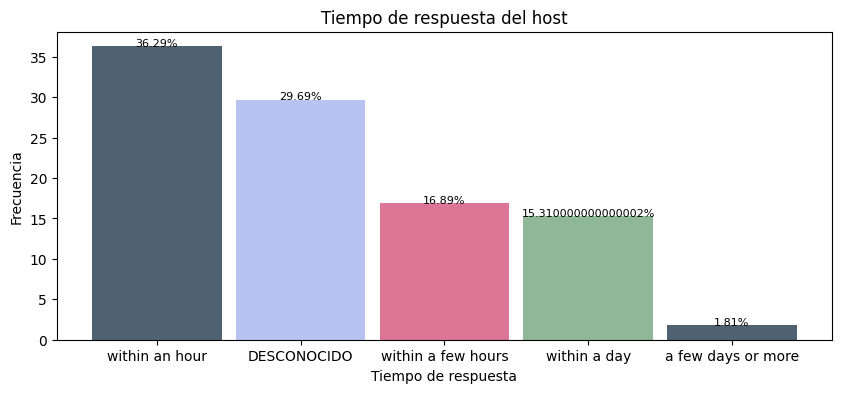

In [26]:
def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

#host_response_time
host_response_time=freq_tbl(Analisis_Amsterdam['host_response_time'])

print(host_response_time.columns)
x = host_response_time['host_response_time']
y = round(host_response_time['percentage'], ndigits=4)*100
print(host_response_time['percentage'])
print(len(x))
print(len(y))


plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Tiempo de respuesta del host')
plt.xlabel('Tiempo de respuesta')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Tasa de aceptación del host')

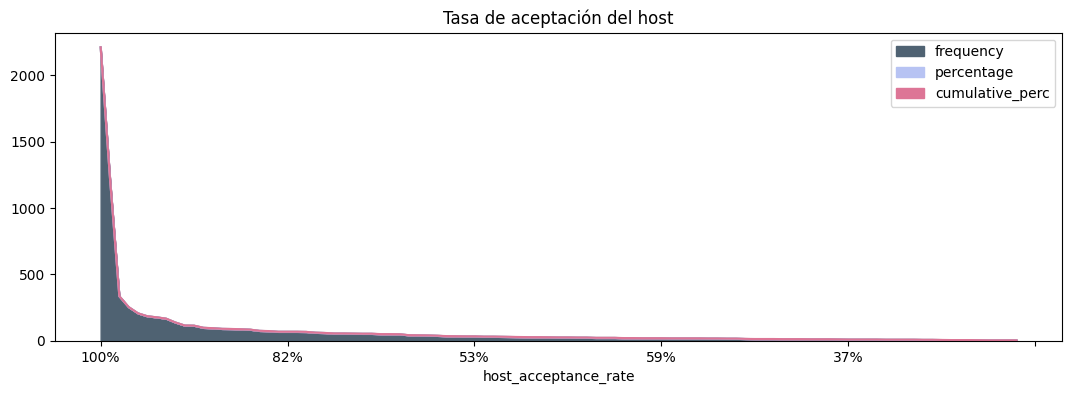

In [27]:
#host_acceptance_rate
host_acceptance_rate=freq_tbl(Analisis_Amsterdam['host_acceptance_rate'])
Filtro_host_acceptance_rate= host_acceptance_rate.set_index('host_acceptance_rate')
Filtro_host_acceptance_rate.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Tasa de aceptación del host')

Text(0.5, 1.0, 'Verificación de la identidad del host')

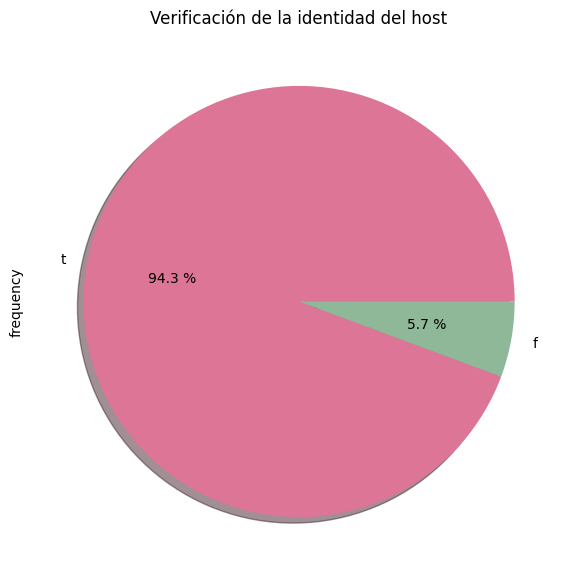

In [28]:
#host_identity_verified
host_identity_verified=freq_tbl(Analisis_Amsterdam['host_identity_verified'])
Filtro_host_identity_verified= host_identity_verified.set_index('host_identity_verified')
Filtro_host_identity_verified["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897'])
plt.title('Verificación de la identidad del host')

In [29]:
#property_type TOP 10
property_type=freq_tbl(Analisis_Amsterdam['property_type'])
Filtro_property_type= property_type.set_index('property_type')
Filtro_property_type.head(10)

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,2901,0.381309,0.381309
Entire condo,1430,0.187960,0.569269
Entire home,561,0.073738,0.643007
Private room in rental unit,478,0.062829,0.705836
Private room in bed and breakfast,285,0.037461,0.743297
Entire townhouse,228,0.029968,0.773265
Entire loft,194,0.025499,0.798764
Private room in condo,164,0.021556,0.820321
Houseboat,143,0.018796,0.839117


In [30]:
#number_of_reviews 
Analisis_Amsterdam['number_of_reviews']= Analisis_Amsterdam['number_of_reviews'].astype(str)
number_of_reviews=freq_tbl(Analisis_Amsterdam['number_of_reviews'])
Filtro_number_of_reviews= number_of_reviews.set_index('number_of_reviews')
Filtro_number_of_reviews

,frequency,percentage,cumulative_perc
number_of_reviews,,,
0,710,0.093323,0.093323
1,451,0.059280,0.152603
2,416,0.054679,0.207282
3,385,0.050605,0.257886
5,312,0.041009,0.298896
...,...,...,...
1134,1,0.000131,0.999474
465,1,0.000131,0.999606
507,1,0.000131,0.999737


Text(0.5, 1.0, 'Disponibilidad de 365')

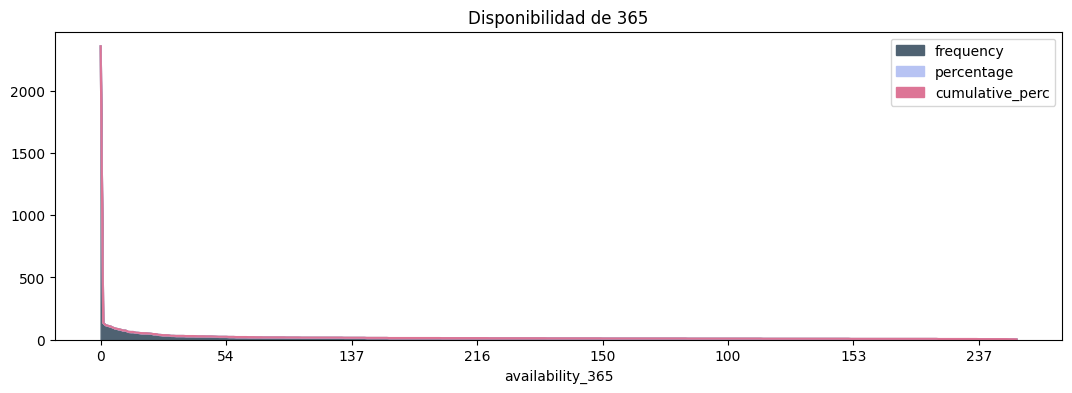

In [31]:
#availability_365
Analisis_Amsterdam['availability_365']= Analisis_Amsterdam['availability_365'].astype(str)
availability_365=freq_tbl(Analisis_Amsterdam['availability_365'])
Filtro_availability_365= availability_365.set_index('availability_365')
Filtro_availability_365.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Disponibilidad de 365')

Text(0.5, 1.0, 'Calificacion de limpieza')

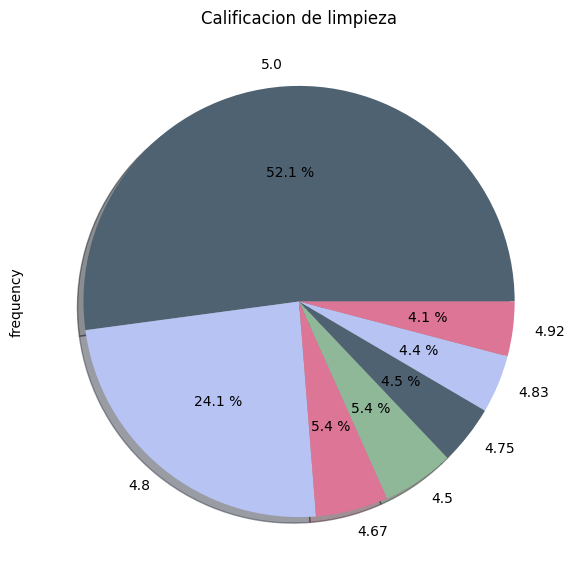

In [32]:
#review_scores_cleanliness
Analisis_Amsterdam['review_scores_cleanliness']= Analisis_Amsterdam['review_scores_cleanliness'].astype(str)
review_scores_cleanliness=freq_tbl(Analisis_Amsterdam['review_scores_cleanliness'])
Filtro_review_scores_cleanliness= review_scores_cleanliness.set_index('review_scores_cleanliness')
Filtro = Filtro_review_scores_cleanliness[Filtro_review_scores_cleanliness['frequency']>150]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de limpieza')

Text(0.5, 1.0, 'Calificacion de comunicacion')

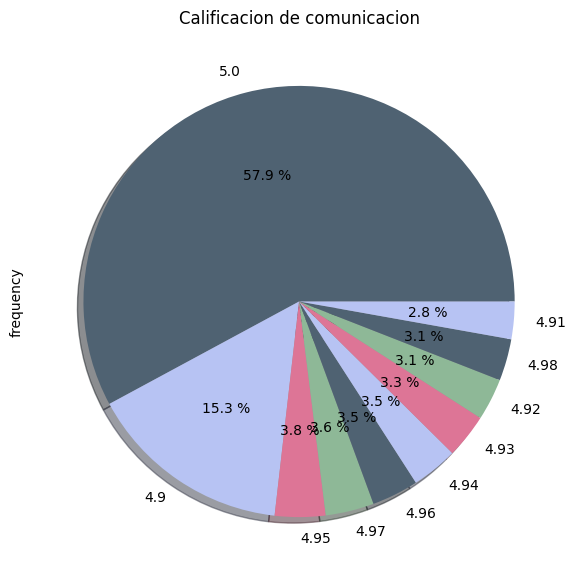

In [33]:
#review_scores_communication
Analisis_Amsterdam['review_scores_communication']= Analisis_Amsterdam['review_scores_communication'].astype(str)
review_scores_communication=freq_tbl(Analisis_Amsterdam['review_scores_communication'])
Filtro_review_scores_communication= review_scores_communication.set_index('review_scores_communication')
Filtro = Filtro_review_scores_communication[Filtro_review_scores_communication['frequency']>150]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de comunicacion')

Text(0.5, 1.0, 'Calificacion de locacion')

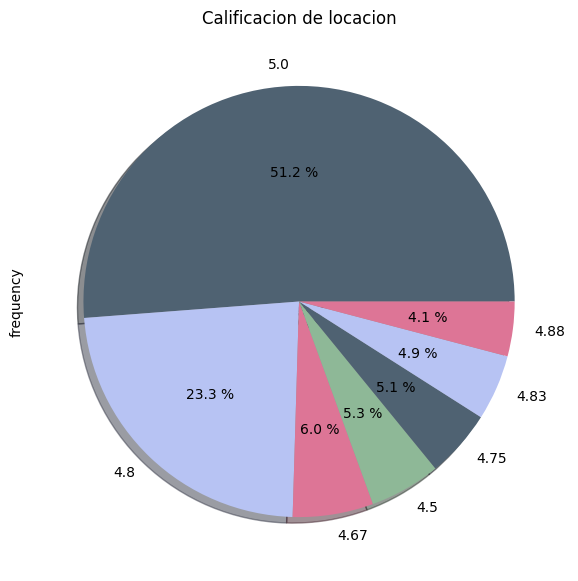

In [34]:
#review_scores_location
Analisis_Amsterdam['review_scores_location']= Analisis_Amsterdam['review_scores_location'].astype(str)
review_scores_location=freq_tbl(Analisis_Amsterdam['review_scores_location'])
Filtro_review_scores_location= review_scores_location.set_index('review_scores_location')
Filtro = Filtro_review_scores_location[Filtro_review_scores_location['frequency']>150]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de locacion')

Text(0.5, 1.0, 'Calificacion de valor')

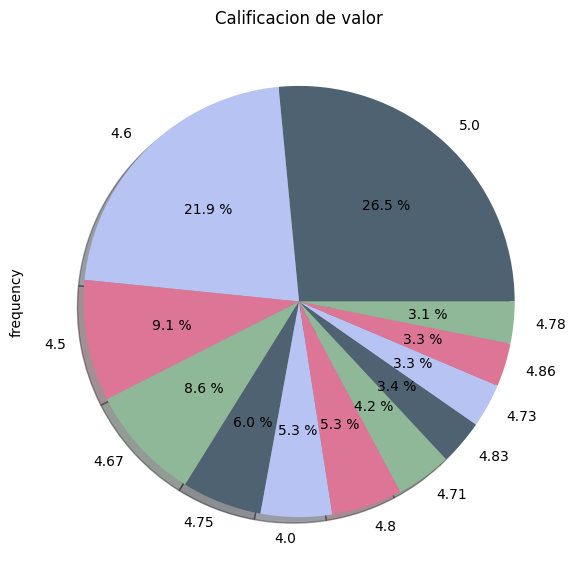

In [35]:
#review_scores_value
Analisis_Amsterdam['review_scores_value']= Analisis_Amsterdam['review_scores_value'].astype(str)
review_scores_value=freq_tbl(Analisis_Amsterdam['review_scores_value'])
Filtro_review_scores_value= review_scores_value.set_index('review_scores_value')
Filtro = Filtro_review_scores_value[Filtro_review_scores_value['frequency']>120]
Filtro["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Calificacion de valor')

In [36]:
#host_location
host_location=freq_tbl(Analisis_Amsterdam['host_location'])
Filtro_host_location= host_location.set_index('host_location')
Filtro_host_location.head(10)

,frequency,percentage,cumulative_perc
host_location,,,
"Amsterdam, Netherlands",6245,0.820846,0.820846
DESCONOCIDO,822,0.108044,0.928891
Netherlands,216,0.028391,0.957282
"London, United Kingdom",18,0.002366,0.959648
"Amstelveen, Netherlands",15,0.001972,0.961619
"Utrecht, Netherlands",13,0.001709,0.963328
"The Hague, Netherlands",9,0.001183,0.964511
"Nederland, CO",8,0.001052,0.965563
"Haarlem, Netherlands",8,0.001052,0.966614


Text(0.5, 1.0, '¿El host es un super host?')

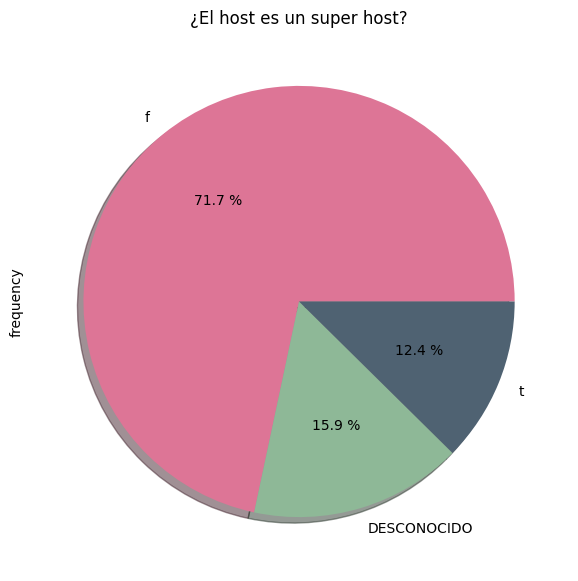

In [37]:
#host_is_superhost
host_is_superhost=freq_tbl(Analisis_Amsterdam['host_is_superhost'])
Filtro_host_is_superhost= host_is_superhost.set_index('host_is_superhost')
Filtro_host_is_superhost["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('¿El host es un super host?')

Text(0.5, 1.0, 'Foto de perfil del host')

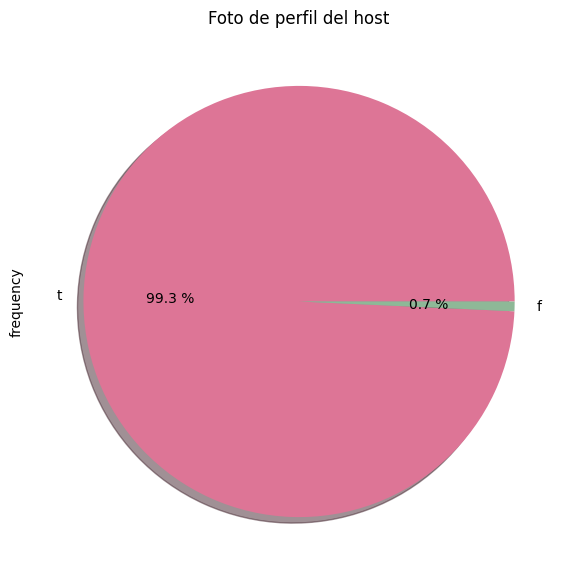

In [38]:
#host_has_profile_pic
host_has_profile_pic=freq_tbl(Analisis_Amsterdam['host_has_profile_pic'])
Filtro_host_has_profile_pic= host_has_profile_pic.set_index('host_has_profile_pic')
Filtro_host_has_profile_pic["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('Foto de perfil del host')

Text(0.5, 1.0, 'Reserva inmediata')

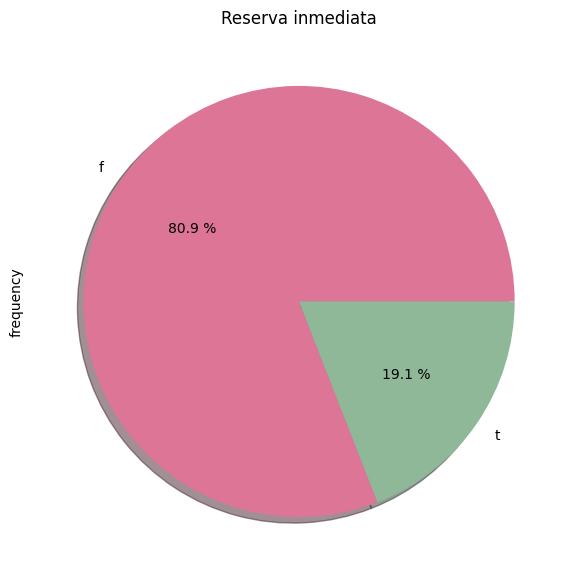

In [39]:
#instant_bookable
instant_bookable=freq_tbl(Analisis_Amsterdam['instant_bookable'])
Filtro_instant_bookable= instant_bookable.set_index('instant_bookable')
Filtro_instant_bookable["frequency"].plot(kind='pie', figsize=(10,7), shadow=True, autopct="%0.1f %%", colors = ['#DD7596', '#8EB897', '#4F6272'])
plt.title('Reserva inmediata')

Text(0.5, 1.0, 'Numero de camas')

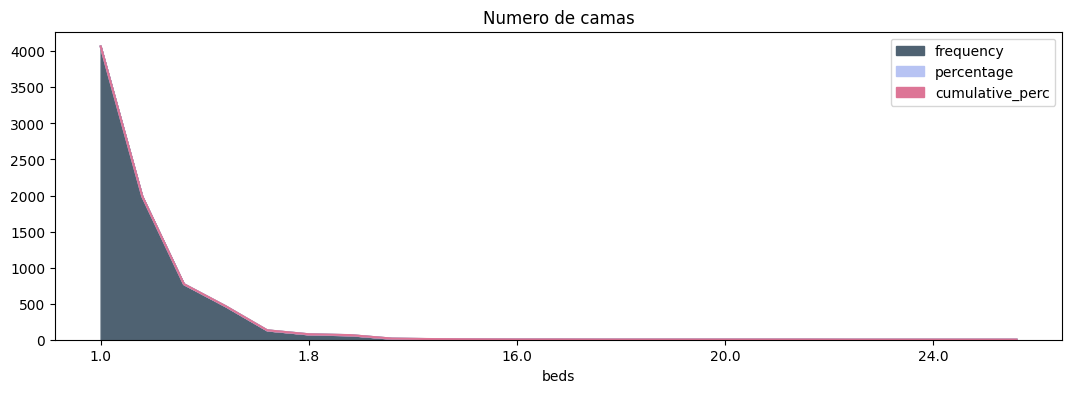

In [40]:
#beds
Analisis_Amsterdam['beds']= Analisis_Amsterdam['beds'].astype(str)
beds=freq_tbl(Analisis_Amsterdam['beds'])
Filtro_beds= beds.set_index('beds')
Filtro_beds.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Numero de camas')

Index(['bathrooms_text', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.439406
1    0.282860
2    0.103049
3    0.053759
4    0.045610
Name: percentage, dtype: float64
5
5


Text(0, 0.5, 'Frecuencia')

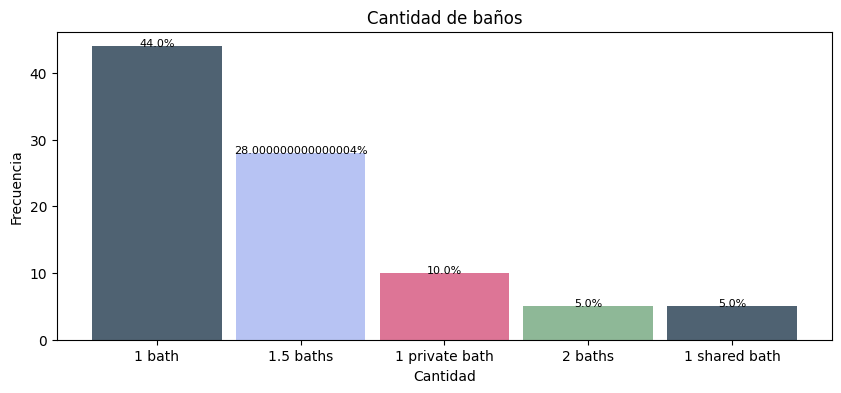

In [64]:
#bathrooms_text

def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

bathrooms_text=freq_tbl(Analisis_Amsterdam['bathrooms_text'])
Filtro = bathrooms_text[bathrooms_text['frequency']>300]

print(Filtro.columns)
x = Filtro['bathrooms_text']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Cantidad de baños')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

Index(['host_verifications', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.804679
1    0.119348
2    0.065852
Name: percentage, dtype: float64
3
3


Text(0, 0.5, 'Frecuencia')

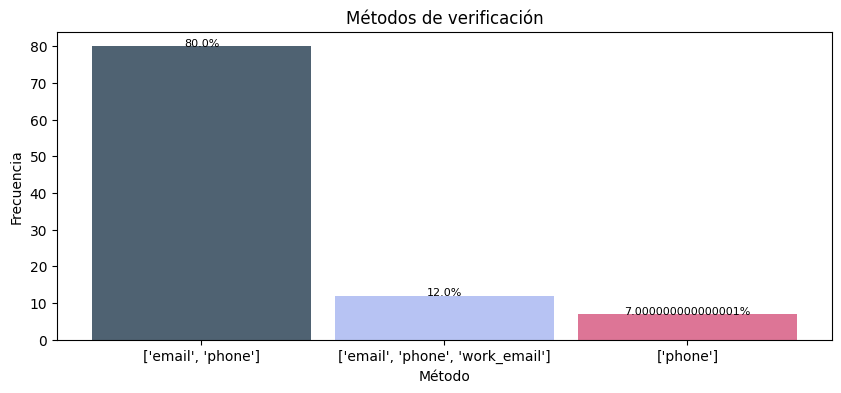

In [42]:
#host_verifications
def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

host_verifications=freq_tbl(Analisis_Amsterdam['host_verifications'])
Filtro = host_verifications[host_verifications['frequency']>400]

print(Filtro.columns)
x = Filtro['host_verifications']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Métodos de verificación')
plt.xlabel('Método')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Noches mínimas')

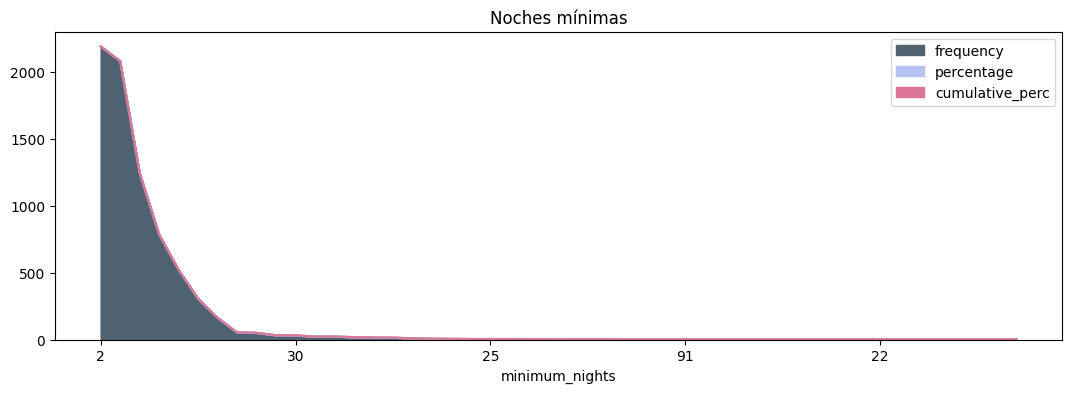

In [43]:
#minimum_nights
Analisis_Amsterdam['minimum_nights']= Analisis_Amsterdam['minimum_nights'].astype(str)
minimum_nights=freq_tbl(Analisis_Amsterdam['minimum_nights'])
Filtro_minimum_nights= minimum_nights.set_index('minimum_nights')
Filtro_minimum_nights.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Noches mínimas')

Text(0.5, 1.0, 'Noches máximas')

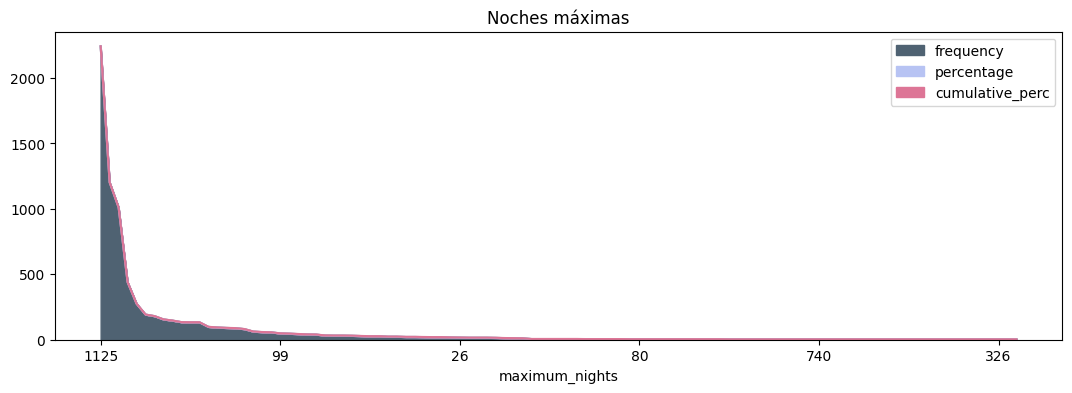

In [44]:
#maximum_nights
Analisis_Amsterdam['maximum_nights']= Analisis_Amsterdam['maximum_nights'].astype(str)
maximum_nights=freq_tbl(Analisis_Amsterdam['maximum_nights'])
Filtro_maximum_nights= maximum_nights.set_index('maximum_nights')
Filtro_maximum_nights.plot(kind='area', figsize=(13,4), color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])
plt.title('Noches máximas')

Index(['number_of_reviews', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0     0.093323
1     0.059280
2     0.054679
3     0.050605
4     0.041009
5     0.040221
6     0.038512
7     0.035095
8     0.024711
9     0.022871
10    0.022082
11    0.021688
12    0.019059
13    0.016299
14    0.014590
15    0.014196
Name: percentage, dtype: float64
16
16


Text(0, 0.5, 'Frecuencia')

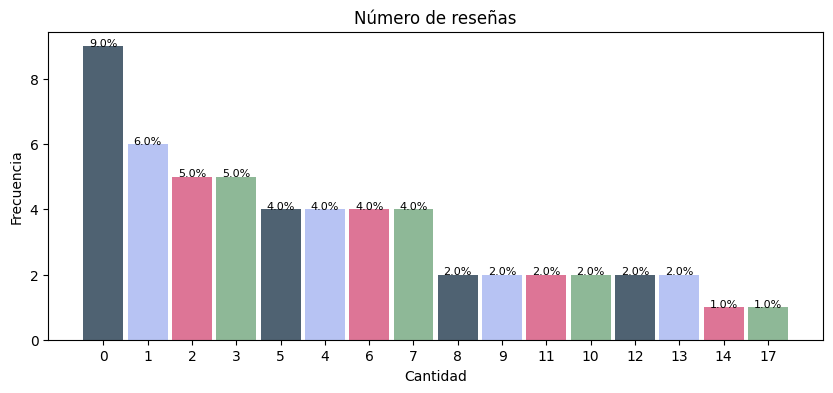

In [45]:
#number_of_reviews


def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

number_of_reviews=freq_tbl(Analisis_Amsterdam['number_of_reviews'])
Filtro = number_of_reviews[number_of_reviews['frequency']>100]

print(Filtro.columns)
x = Filtro['number_of_reviews']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Número de reseñas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

In [61]:
Analisis_Amsterdam['price']= Analisis_Amsterdam['price'].astype(str)

Index(['price', 'frequency', 'percentage', 'cumulative_perc'], dtype='object')
0    0.036672
1    0.034963
2    0.032334
3    0.028391
4    0.021162
5    0.017482
6    0.016430
7    0.014984
8    0.013407
9    0.013275
Name: percentage, dtype: float64
10
10


Text(0, 0.5, 'Frecuencia')

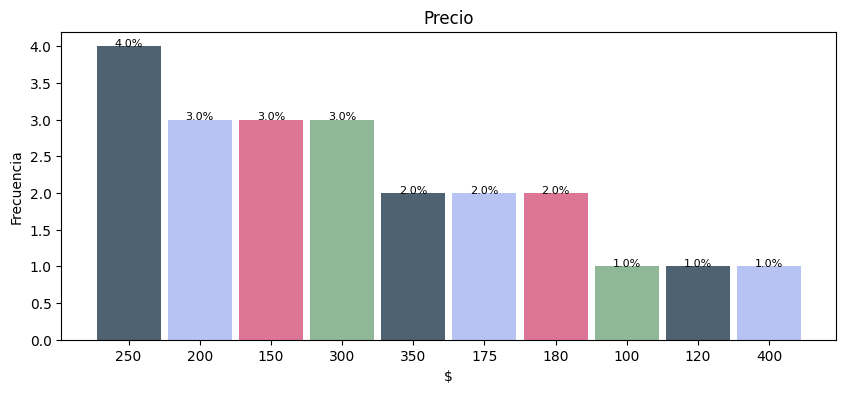

In [63]:
#price


def addlabels(x,y):
    for i in range(len(x)):
        s= str(y[i])+"%"
        plt.text(i,y[i],s, ha='center', fontsize = 8)

price=freq_tbl(Analisis_Amsterdam['price'])
Filtro = price[price['frequency']>100]

print(Filtro.columns)
x = Filtro['price']
y = round(Filtro['percentage'], ndigits=2)*100
print(Filtro['percentage'])
print(len(x))
print(len(y))



plt.figure(figsize=(10,4))
plt.bar(x,y, width=0.9, color = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897'])


addlabels(x,y)

plt.title('Precio')
plt.xlabel('$')
plt.ylabel('Frecuencia')